In [30]:
# Create graphs for the following categories:
# First fixation duration vs Skill
# Fixation duration vs Skill
# Gaze duration vs Skill
# Single fixation probability vs Skill
# Refixation probability vs Skill

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

def create_figure(df, typ, column, name, color):
	# Create the graph for First fixation duration vs Skill
	df.plot.scatter(x='Skill', y=column, c=color)
	plt.xlabel('Programmer Efficacy')
	plt.ylabel(name)
	# Add a line of best fit
	x = df['Skill']
	y = df[column]
	m, b = np.polyfit(x, y, 1)	
	plt.plot(x, m*x + b)
	# Calculate spearmans correlation and p value up to 2 decimals and add them to the plot in the top right corner
	corr, p = stats.spearmanr(x, y)
	plt.text(0.7, 0.9, f'Spearman ρ: {corr:.2f}\np: {p:.2f}', horizontalalignment='left', verticalalignment='center', transform=plt.gca().transAxes)
	plt.savefig(f'graphs/{typ}_{name} vs Skill with line of best fit.png')


def show_results(type):

	# Load the data
	df = pd.read_csv(f'{type}_metrics.csv')

	# Create the graph for First fixation duration vs Skill
	create_figure(df, type, 'FirstFixationDuration', 'First Fixation Duration in ms', 'Orange')
	# Create the graph for Fixation duration vs Skill
	create_figure(df, type, 'SingleFixationDuration', 'Fixation Duration in ms', 'Green')
	# Create the graph for Gaze duration vs Skill
	create_figure(df, type, 'GazeDuration', 'Gaze Duration in ms', 'Purple')
	# Create the graph for Skip Token fixation probability vs Skill
	create_figure(df, type, 'TokenNoFixationProbability', 'Skip Token Probability', 'Black')
	# Create the graph for Single fixation probability vs Skill
	create_figure(df, type, 'TokenSingleFixationProbability', 'Single Fixation Probability', 'Blue')
	# Create the graph for Refixation probability vs Skill
	create_figure(df, type, 'TokenMultipleFixationProbability', 'Refixation Probability', 'Red')




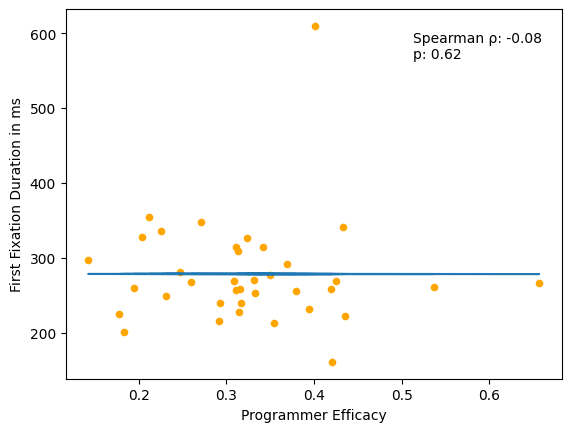

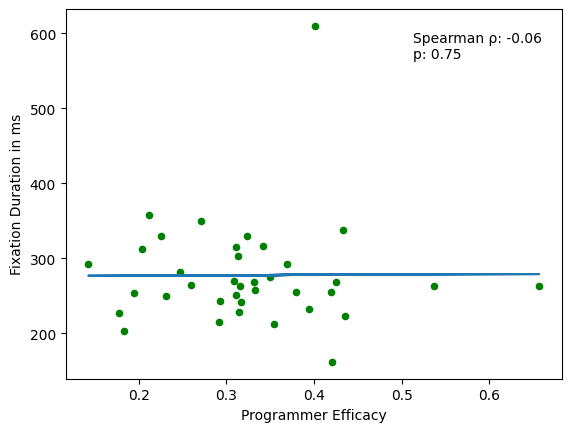

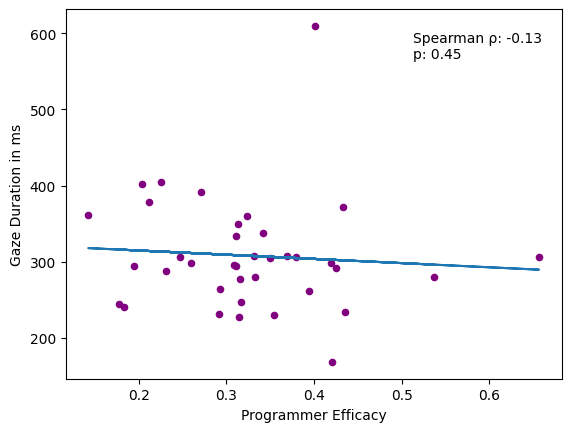

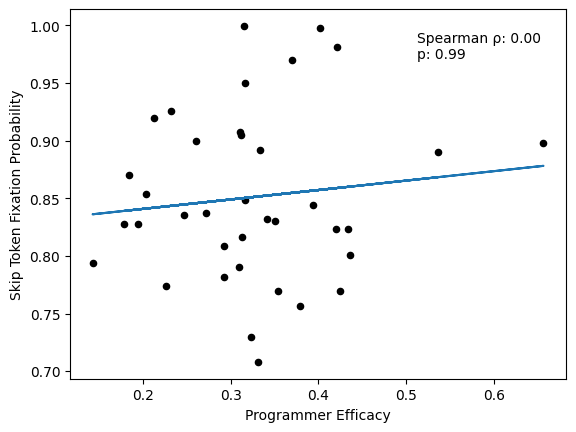

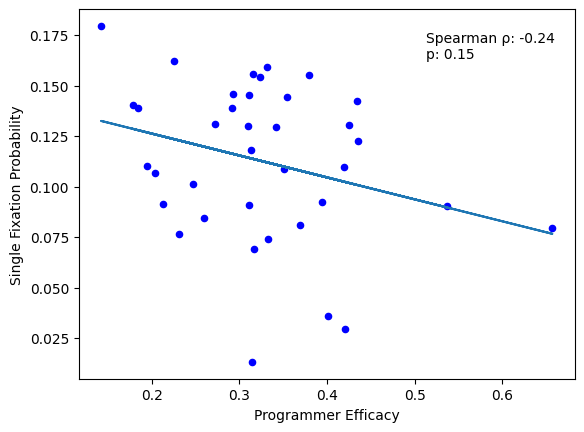

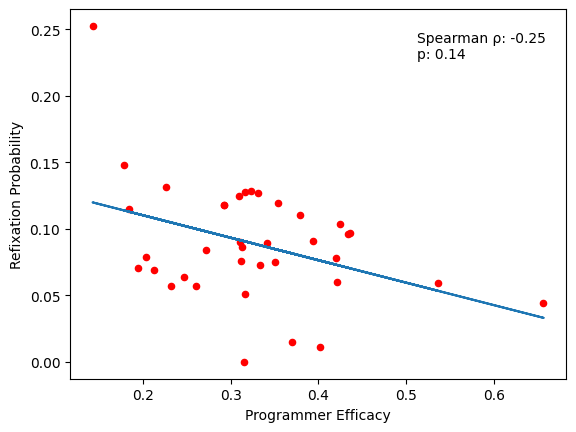

In [31]:
show_results("ogama")

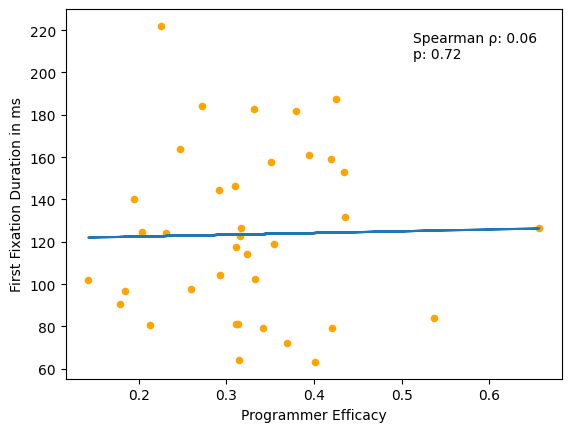

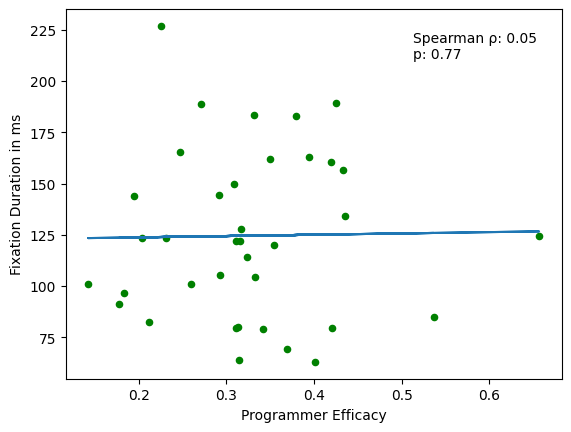

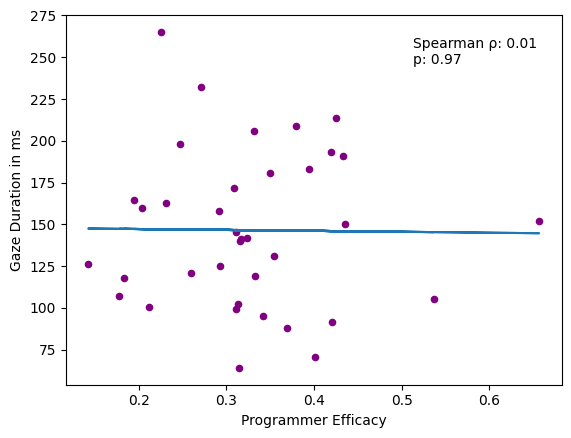

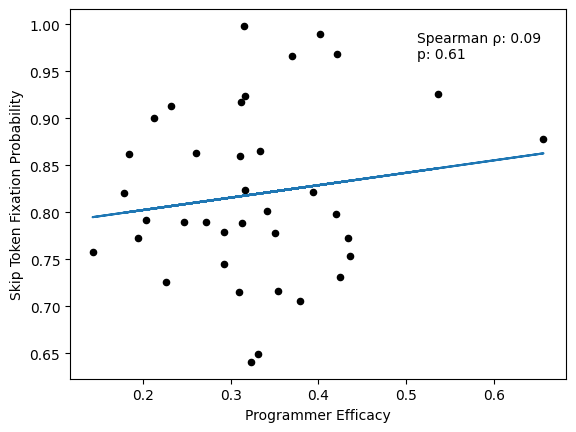

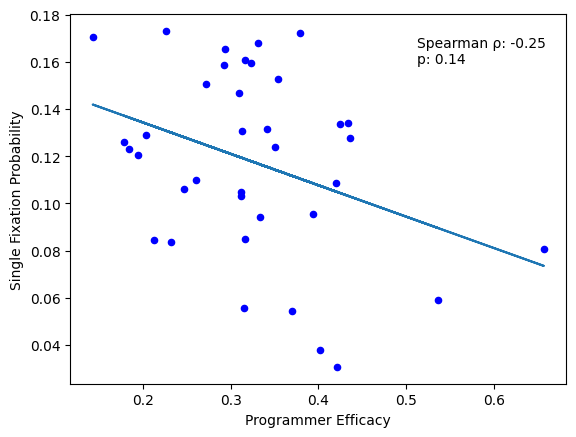

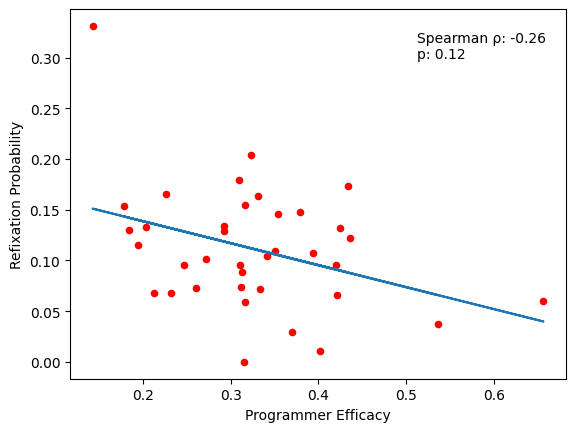

In [32]:
show_results("pygaze")	

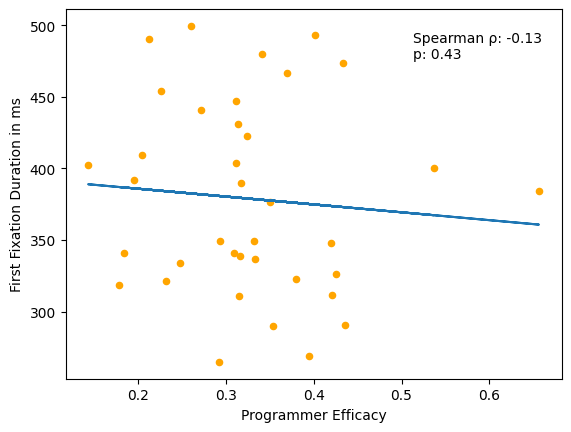

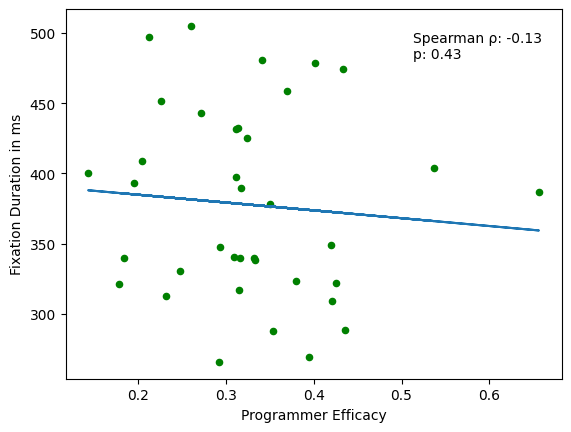

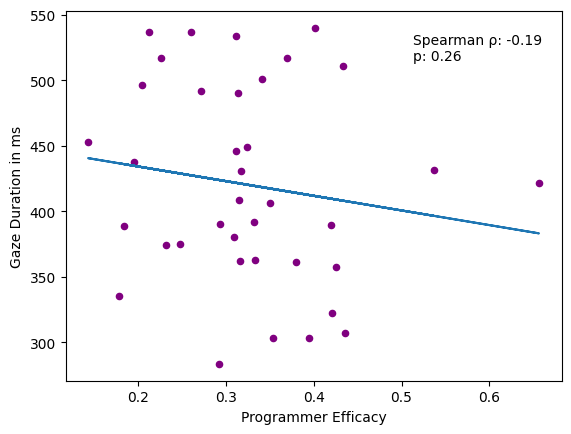

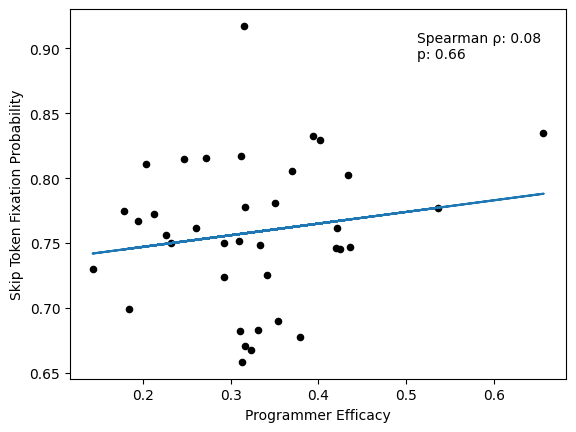

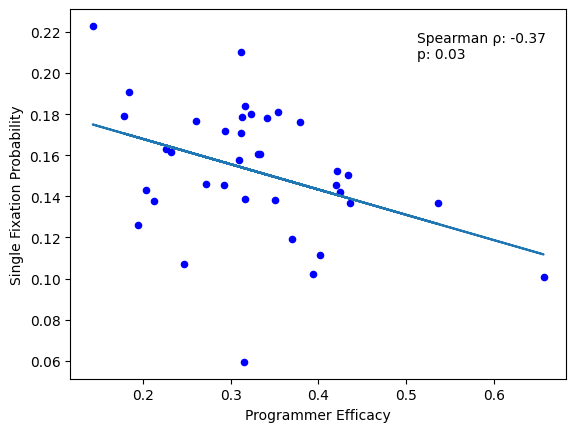

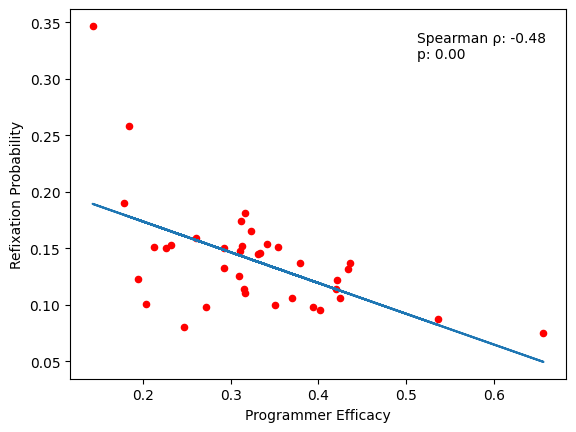

In [47]:
show_results("original")

In [48]:
# Compare the results of the LOC coverage for the original study, Ogama and PyGaze
df_pygaze = pd.DataFrame({
    '10%': [0.0173067804646752],
    '20%': [-0.03556187766714082],
    '30%': [-0.07894736842105263],
    '40%': [-0.08179231863442388],
    '50%': [-0.11450924608819343],
    '60%': [-0.11190137505926978],
    '70%': [-0.1505452821242295],
    '80%': [-0.16666666666666663],
    '90%': [-0.19511616880037932],
    '100%': [-0.2413466097676624]
})

df_ogama = pd.DataFrame({
    '10%': [-0.0049786628733997145],
    '20%': [-0.0644855381697487],
    '30%': [-0.07373162636320531],
    '40%': [-0.07136083451872925],
    '50%': [-0.08843053579895685],
    '60%': [-0.0948316737790422],
    '70%': [-0.1254148885727833],
    '80%': [-0.15504978662873398],
    '90%': [-0.15836889521100045],
    '100%': [-0.22830725462304408]
})
# Create a df with the original values
df = pd.DataFrame({
    '10%': [-0.08,],
    '20%': [-0.09],
    '30%': [-0.11],
    '40%': [-0.11],
    '50%': [-0.17],
    '60%': [-0.21],
    '70%': [-0.26],
    '80%': [-0.26],
    '90%': [-0.28],
    '100%': [-0.35]
})

df = pd.concat([df, df_ogama, df_pygaze])

# Name the rows
df.index = ['Efficacy Original', 'Efficacy Ogama', 'Efficacy PyGaze']
# Show only the first 2 decimals
df = df.round(2)
df





,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
Efficacy Original,-0.08,-0.09,-0.11,-0.11,-0.17,-0.21,-0.26,-0.26,-0.28,-0.35
Efficacy Ogama,-0.00,-0.06,-0.07,-0.07,-0.09,-0.09,-0.13,-0.16,-0.16,-0.23
Efficacy PyGaze,0.02,-0.04,-0.08,-0.08,-0.11,-0.11,-0.15,-0.17,-0.20,-0.24
